<a href="https://colab.research.google.com/github/hyeonji826/Linear-Algebra/blob/main/2_Elimination_with_Matirces_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.linalg
import torch


## 1. 삼각행렬 정의 및 생성
- 하삼각행렬(Lower Triangular Matrix)
- 상삼각행렬(Upper Triangular Matrix)

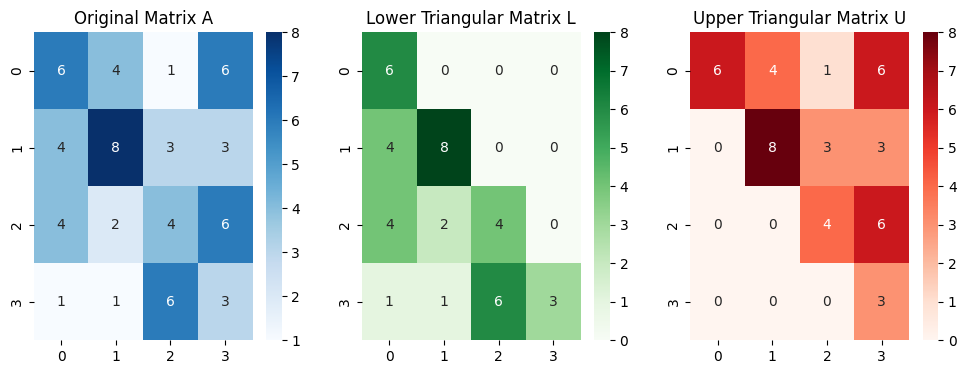

In [8]:
def create_triangular_matrices():
    A = np.random.randint(1,10,(4,4))
    L = np.tril(A)  # 하삼각행렬
    U = np.triu(A)  # 상삼각행렬
    return A, L, U

A, L, U = create_triangular_matrices()

# 시각화
def plot_matrices(A,L,U):
    # 1행 3열짜리 그래프(서프플롯) 공간을 만듦
    fig, axes =plt.subplots(1,3,figsize=(12,4))
    # 개별 서프플롯 객체를 만듦
    # 각 셀에 숫자표시(annot=True or False) 후, 정수형식으로 표시(fmt="d")
    sns.heatmap(A, annot=True, fmt="d", cmap="Blues", ax=axes[0])
    axes[0].set_title("Original Matrix A")
    sns.heatmap(L, annot=True, fmt="d", cmap="Greens", ax=axes[1])
    axes[1].set_title("Lower Triangular Matrix L")
    sns.heatmap(U, annot=True, fmt="d", cmap="Reds", ax=axes[2])
    axes[2].set_title("Upper Triangular Matrix U")
    plt.show()

plot_matrices(A, L, U)

## 2. 가우스 소거법을 이용한 상삼각행렬 변환

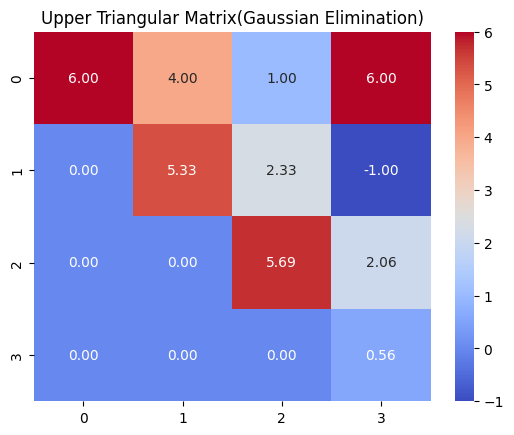

In [11]:
def gaussian_elimination(A):
    U = scipy.linalg.lu(A)[2]   # LU 분해에서 U추출
    return U

U_transformed = gaussian_elimination(A)

# 변환된 상삼각행렬 시각화
sns.heatmap(U_transformed,annot=True,fmt=".2f",cmap="coolwarm")
plt.title("Upper Triangular Matrix(Gaussian Elimination)")
plt.show()

## 3. Xavier 초기화를 이용한 가중치 행렬 생성

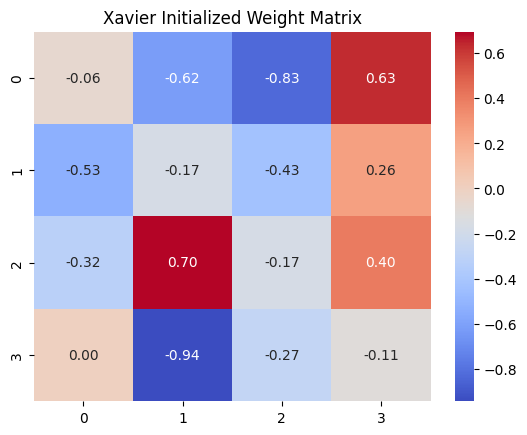

In [12]:
def xavier_initialization(shape):
    # 뉴련의 개수를 고려한 가중치 행렬을 생성한다.
    # sum(shape)은 뉴련의 입력 개수와 출력 개수의 합이다.
    return np.random.randn(*shape)*np.sqrt(2/sum(shape))
weight_matrix= xavier_initialization((4,4))

# 가중치 시각화
sns.heatmap(weight_matrix,annot=True,fmt=".2f",cmap="coolwarm")
plt.title("Xavier Initialized Weight Matrix")
plt.show()

## 4. L1 정규화 적용 예제

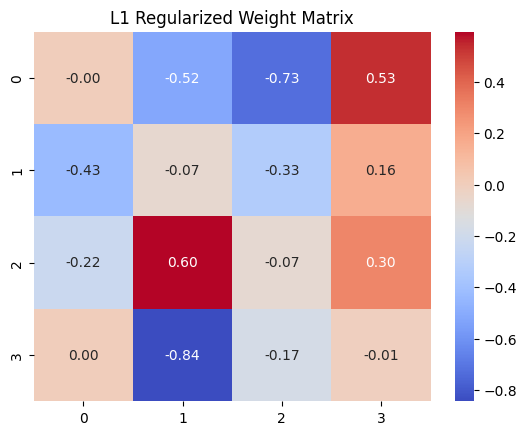

In [14]:
def apply_l1_regularization(weights,lambda_l1=0.1):
    # L1 정규화에서 사용하는 소프트 임계값 임계화 구현
    # L1 정규화는 가중치를 0으로 수축시키는 효과를 가지고 있다.
    # (np.abs(weights)-lambda_l1,0) -> 절대값에서 L1 정규화 계수를 뺀다.
    # 즉, 가중치의 크기를 lambda_l1만큼 줄인다.
    # np.sign(weights) -> weights의 부호를 반환시킨다.
    return np.sign(weights)*np.maximum(np.abs(weights)-lambda_l1,0)

regularized_weights = apply_l1_regularization(weight_matrix)

# 정규화된 가중치 시각화
sns.heatmap(regularized_weights,annot=True,fmt=".2f",cmap="coolwarm")
plt.title("L1 Regularized Weight Matrix")
plt.show()
